# StackOverflow Developer Survey 2022
In this notebook, we will analyze the Stackoverflow developer survey dataset for 2022. This dataset contains responses to annual survey conducted by stackoverflow.

The dataset can be downloaded from https://insights.stackoverflow.com/survey <br>
The downloaded zip file contains the following files :

- survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer
- survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name
- so_survey_2022.pdf - PDF file of the survey instrument
- README_2022.txt - TXT file containing information about the dataset and survey.

Please refer to the README_2022.txt for more information



Let us load the survey_results_public.csv using the pandas library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
survey_df = pd.read_csv("StackOverflow_2022/survey_results_public.csv")

In [4]:
survey_df

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73264,73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73265,73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN
73266,73267,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN


In [5]:
survey_df.shape


(73268, 79)

The dataset contains 73000 responses for 79 questions. Although many of these questions are optional. The identity of the participants are hidden and they have been assigned a unique Respondent ID.

Now we will see the columns present in the survey dataset

In [6]:
survey_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

Many questions have been assigned short names here in the columns. Let us load the schema csv file and view the questions in detail.


In [7]:
#Setting the max columns and row display
pd.set_option('display.max_columns', 79)
pd.set_option('display.max_rows', 85)

In [8]:
schema_df = pd.read_csv("StackOverflow_2022/survey_results_schema.csv")
schema_df

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
6,QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR
7,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
8,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR
9,QID276,LearnCode,How did you learn to code? Select all that apply.,False,MC,MAVR


qname is the question name here and questions column has the detailed query. Let's change the index of the schema df to qname


In [9]:
schema_df=schema_df.set_index('qname')
schema_df.head(20)

,qid,question,force_resp,type,selector
qname,,,,,
S0,QID16,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
MetaInfo,QID12,Browser Meta Info,False,Meta,Browser
S1,QID1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
MainBranch,QID2,Which of the following options best describes ...,True,MC,SAVR
Employment,QID296,Which of the following best describes your cur...,False,MC,MAVR
RemoteWork,QID308,Which best describes your current work situation?,False,MC,SAVR
CodingActivities,QID297,Which of the following best describes the code...,False,MC,MAVR
S2,QID190,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
EdLevel,QID25,Which of the following best describes the high...,False,MC,SAVR


Let's retrieve full question for a given qname

In [10]:
schema_df.loc['CodingActivities','question']

'Which of the following best describes the code you write outside of work? Select all that apply.'


### Data Preparation and Cleaning 

As the data is huge, we will limit ourselves to few relevant columns only. Let us again have a look on the schema df and choose the relevat cols

In [11]:
selected_columns  = [
    'Country',
    'Age',
    'Gender',
    'Ethnicity',
    'EdLevel',
    'YearsCode',
    'YearsCodePro',
    'CodingActivities',
    'LearnCodeCoursesCert',
    'LanguageHaveWorkedWith',
    'DatabaseHaveWorkedWith',
    'WebframeHaveWorkedWith',
    'ToolsTechHaveWorkedWith',
    'Employment',
    'DevType',
    'CompTotal', 
    'OpSysProfessional use',
    'WebframeWantToWorkWith',
    'LanguageWantToWorkWith',
    'ToolsTechWantToWorkWith',
    'WorkExp'
    ]
len(selected_columns)

21

In [12]:
survey_select_df = survey_df[selected_columns].copy()



In [13]:
survey_select_df.shape

(73268, 21)

In [14]:
survey_select_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  71771 non-null  object 
 1   Age                      70946 non-null  object 
 2   Gender                   70853 non-null  object 
 3   Ethnicity                69474 non-null  object 
 4   EdLevel                  71571 non-null  object 
 5   YearsCode                71331 non-null  object 
 6   YearsCodePro             51833 non-null  object 
 7   CodingActivities         58899 non-null  object 
 8   LearnCodeCoursesCert     29389 non-null  object 
 9   LanguageHaveWorkedWith   70975 non-null  object 
 10  DatabaseHaveWorkedWith   60121 non-null  object 
 11  WebframeHaveWorkedWith   53544 non-null  object 
 12  ToolsTechHaveWorkedWith  54171 non-null  object 
 13  Employment               71709 non-null  object 
 14  DevType               

From the above, we can see that all the columns have null/empty values. Also,let us convert  YearsCode, YearsCodePro to numerical values

In [15]:

survey_select_df['YearsCode'] = pd.to_numeric(survey_select_df.YearsCode,errors ='coerce')
survey_select_df['YearsCodePro'] = pd.to_numeric(survey_select_df.YearsCodePro,errors ='coerce')

In [16]:
survey_select_df.describe()


,YearsCode,YearsCodePro,CompTotal,WorkExp
count,69746.000000,49820.000000,3.842200e+04,36769.000000
mean,12.403951,10.268727,2.342434e+52,10.242378
std,9.722896,8.576772,4.591478e+54,8.706850
min,1.000000,1.000000,0.000000e+00,0.000000
25%,5.000000,4.000000,3.000000e+04,4.000000
50%,10.000000,8.000000,7.750000e+04,8.000000
75%,17.000000,15.000000,1.540000e+05,15.000000
max,50.000000,50.000000,9.000000e+56,50.000000


In [17]:
survey_select_df['Gender'].value_counts()


Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

The gender column has multiple options. Apart from the first 3 options, most are very less in count. For simplification purpose, let us keep the first 4 genders.


In [18]:
survey_select_df.where(~(survey_select_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)
survey_select_df.where(~(survey_select_df.Gender.str.contains('Or, in your own words:', na=False)), np.nan, inplace=True)



In [19]:
survey_select_df.head(10)

,Country,Age,Gender,Ethnicity,EdLevel,YearsCode,YearsCodePro,CodingActivities,LearnCodeCoursesCert,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith,Employment,DevType,CompTotal,OpSysProfessional use,WebframeWantToWorkWith,LanguageWantToWorkWith,ToolsTechWantToWorkWith,WorkExp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,NaN,NaN,NaN,NaN,Hobby;Contribute to open-source projects,NaN,JavaScript;TypeScript,NaN,NaN,NaN,"Employed, full-time",NaN,NaN,macOS,NaN,Rust;TypeScript,NaN,NaN
2,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,White,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14.0,5.0,Hobby,NaN,C#;C++;HTML/CSS;JavaScript;Python,Microsoft SQL Server,Angular.js,NaN,"Employed, full-time",Data scientist or machine learning specialist;...,32000.0,Windows,Angular;Angular.js,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN
3,Israel,35-44 years old,Man,White,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20.0,17.0,I don’t code outside of work,NaN,C#;JavaScript;SQL;TypeScript,Microsoft SQL Server,ASP.NET;ASP.NET Core,NaN,"Employed, full-time","Developer, full-stack",60000.0,Windows,ASP.NET;ASP.NET Core,C#;SQL;TypeScript,NaN,NaN
4,United States of America,25-34 years old,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8.0,3.0,Hobby,NaN,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,Cloud Firestore;Elasticsearch;Microsoft SQL Se...,Angular;ASP.NET;ASP.NET Core ;jQuery;Node.js,npm,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN,Windows,Angular;ASP.NET Core ;Blazor;Node.js,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,Docker;Kubernetes,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,India,Under 18 years old,Man,Indian,"Secondary school (e.g. American high school, G...",3.0,NaN,NaN,NaN,C++;HTML/CSS;JavaScript;PHP;Python;TypeScript,Cloud Firestore;MongoDB;Firebase Realtime Data...,Angular;Next.js;Node.js;React.js;Svelte;Vue.js,Homebrew;npm,"Student, part-time",NaN,NaN,macOS,Django;Flask;Gatsby;jQuery;Next.js;Node.js;Rea...,C;C#;C++;Elixir;Go;HTML/CSS;Java;JavaScript;Ko...,npm,NaN
7,India,18-24 years old,Man,Indian,Some college/university study without earning ...,1.0,NaN,NaN,Coursera;Udemy,C;C++;HTML/CSS;Java;JavaScript;SQL,MongoDB;MySQL,jQuery;Node.js,npm,"Not employed, but looking for work","Developer, full-stack;Student",NaN,Linux-based;macOS,Angular;Angular.js;Next.js;Vue.js,APL;Bash/Shell;Go;Python;TypeScript,Unity 3D;Yarn,NaN
8,Netherlands,25-34 years old,Woman,European,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6.0,6.0,I don’t code outside of work,NaN,NaN,NaN,NaN,NaN,"Employed, full-time","Developer, back-end",46000.0,Windows,NaN,NaN,NaN,6.0
9,Croatia,45-54 years old,Woman,White;European,Some college/university study without earning ...,37.0,30.0,Hobby;Contribute to open-source projects;Boots...,NaN,Delphi;Java;Swift,NaN,NaN,NaN,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",NaN,Windows,NaN,Delphi;Java;Swift,NaN,NaN


Now let us look at the Gender again.It should contain only 4 entries 

In [20]:
survey_select_df['Gender'].value_counts()


Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Name: Gender, dtype: int64

Let us look at some more parameters

In [21]:
survey_select_df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          29987
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15330
Some college/university study without earning a degree                                 9139
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7741
Associate degree (A.A., A.S., etc.)                                                    2209
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2144
Primary/elementary school                                                              1748
Something else                                                                         1198
Professional degree (JD, MD, etc.)                                                     1105
Name: EdLevel, dtype: int64

From the above we can conclude that most of the developers are either Masters or Bachelors degree holders.

Let us look at the LanguageHaveWorkedWith 

Analysing the Age group

In [23]:
survey_select_df['Age'].value_counts()

25-34 years old       27787
18-24 years old       16422
35-44 years old       13814
45-54 years old        5230
Under 18 years old     3740
55-64 years old        1963
65 years or older       534
Prefer not to say       496
Name: Age, dtype: int64

#### Most popular Roles

Let us look at the column DevType

In [24]:
survey_select_df["DevType"].value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  7073
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    5252
Developer, front-end                                                                                                                            

As the survey allows for multiple roles to be entered, it really becomes harder to derive any useful insight for all the multiple roles. Let us define a function that turns a column containing list of roles into a dataframe with one column for each possible option

In [35]:
def split_multicolumn(col_series) :
    dev_df = col_series.to_frame()
    options = []

    for index, value in col_series[col_series.notnull()].iteritems() :
        for option in value.split(';')  :
            if not option in dev_df.columns :
                options.append(option)
                dev_df[option]=False
            dev_df.at[index,option] = True
    return dev_df[options]




In [26]:
dev_type_df = split_multicolumn(survey_select_df.DevType)
dev_type_df


,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",Educator,Engineering manager,Database administrator,Academic researcher,DevOps specialist,Other (please specify):,"Developer, embedded applications or devices","Developer, game or graphics",Project manager,Cloud infrastructure engineer,Data or business analyst,Designer,Scientist,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Blockchain,Marketing or sales professional,Security professional
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73264,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
73266,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
dev_total = dev_type_df.sum().sort_values(ascending=False)
dev_total

Developer, full-stack                            28354
Developer, back-end                              26275
Developer, front-end                             15689
Developer, desktop or enterprise applications     9415
Developer, mobile                                 7533
DevOps specialist                                 6064
Student                                           5477
Cloud infrastructure engineer                     5194
Database administrator                            4842
System administrator                              4802
Developer, embedded applications or devices       3852
Project manager                                   3822
Designer                                          3693
Engineer, data                                    3543
Engineering manager                               3516
Data scientist or machine learning specialist     3367
Data or business analyst                          3154
Developer, QA or test                             3024
Academic r

Text(0, 0.5, 'Roles')

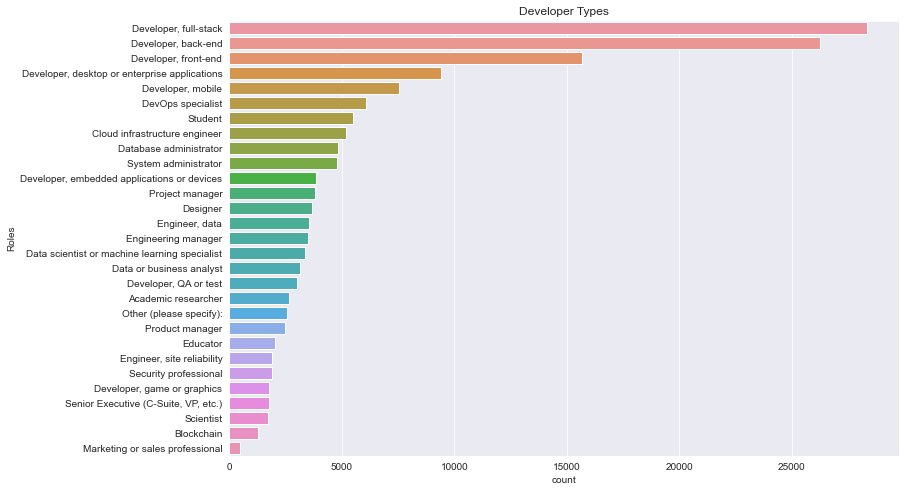

In [30]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.barplot(x=dev_total, y=dev_total.index)
plt.title("Developer Types")
plt.xlabel('count')
plt.ylabel('Roles')

From the above, we can see that Full stack development role is still leading in 2022 followed by back-end developer role. Blockchain is still in very early stage and is second last from bottom. 

### Most popular Languages

Let us look at the column LanguageHaveWorkedWith

In [36]:
survey_select_df["LanguageHaveWorkedWith"]

0                                                      NaN
1                                    JavaScript;TypeScript
2                        C#;C++;HTML/CSS;JavaScript;Python
3                             C#;JavaScript;SQL;TypeScript
4              C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript
                               ...                        
73263    Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...
73264            Bash/Shell;HTML/CSS;JavaScript;Python;SQL
73265                   HTML/CSS;JavaScript;PHP;Python;SQL
73266                                        C#;Delphi;VBA
73267          C#;JavaScript;Lua;PowerShell;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 73268, dtype: object

Here also we see that every participant has entered multiple languages. Let us split these as well using the helper function which we created

In [38]:
languages_df = split_multicolumn(survey_select_df.LanguageHaveWorkedWith)
languages_df

,JavaScript,TypeScript,C#,C++,HTML/CSS,Python,SQL,Swift,PHP,C,Java,Delphi,Bash/Shell,PowerShell,Rust,Elixir,Erlang,Ruby,R,Scala,VBA,Dart,Go,Kotlin,Groovy,MATLAB,Perl,Lua,Haskell,Julia,LISP,Assembly,F#,Clojure,APL,Crystal,Fortran,Objective-C,SAS,OCaml,Solidity,COBOL
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,True,True,False,False,False,True,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73264,True,False,False,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


A total of 42 languages are being used currently.

In [41]:
languages_worked = languages_df.sum().sort_values(ascending=False)
languages_worked

JavaScript     45800
HTML/CSS       38579
SQL            34663
Python         33650
TypeScript     24384
Java           23298
Bash/Shell     20270
C#             19592
C++            15771
PHP            14599
C              13442
PowerShell      8431
Go              7792
Rust            6452
Kotlin          6386
Dart            4576
Ruby            4210
Assembly        3769
Swift           3425
R               3250
VBA             3129
MATLAB          2858
Lua             2783
Groovy          2312
Delphi          2280
Scala           1792
Objective-C     1658
Perl            1601
Haskell         1518
Elixir          1491
Julia           1055
Clojure         1036
Solidity        1001
LISP             891
F#               708
Fortran          625
Erlang           613
APL              467
COBOL            440
SAS              412
OCaml            399
Crystal          320
dtype: int64

Text(0, 0.5, 'Languages')

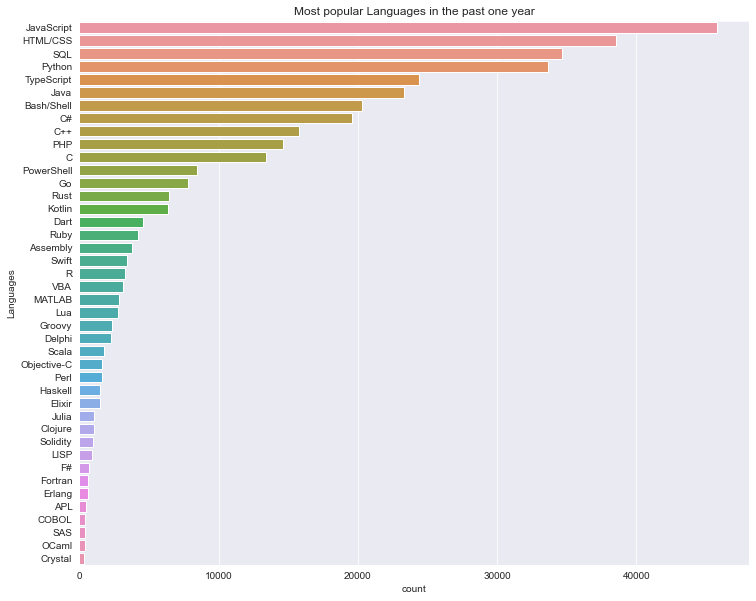

In [45]:
plt.figure(figsize=(12, 10))
sns.set_style('darkgrid')
sns.barplot(x=languages_worked, y=languages_worked.index)
plt.title("Most popular Languages in the past one year")
plt.xlabel('count')
plt.ylabel('Languages')

### Country 

Let us look at the number of countries from where the participants of the survey are 

In [46]:
survey_select_df.Country.nunique()

180

There are total 180 countries. We will limit ourselves to top 35 countires from where responses were recorded.

In [49]:
countries = survey_select_df.Country.value_counts().head(25)
countries

United States of America                                13265
India                                                    6613
Germany                                                  5317
United Kingdom of Great Britain and Northern Ireland     4111
Canada                                                   2450
France                                                   2290
Brazil                                                   2080
Poland                                                   1710
Netherlands                                              1536
Spain                                                    1502
Italy                                                    1497
Australia                                                1444
Russian Federation                                       1205
Turkey                                                   1011
Sweden                                                   1006
Switzerland                                               917
Austria 

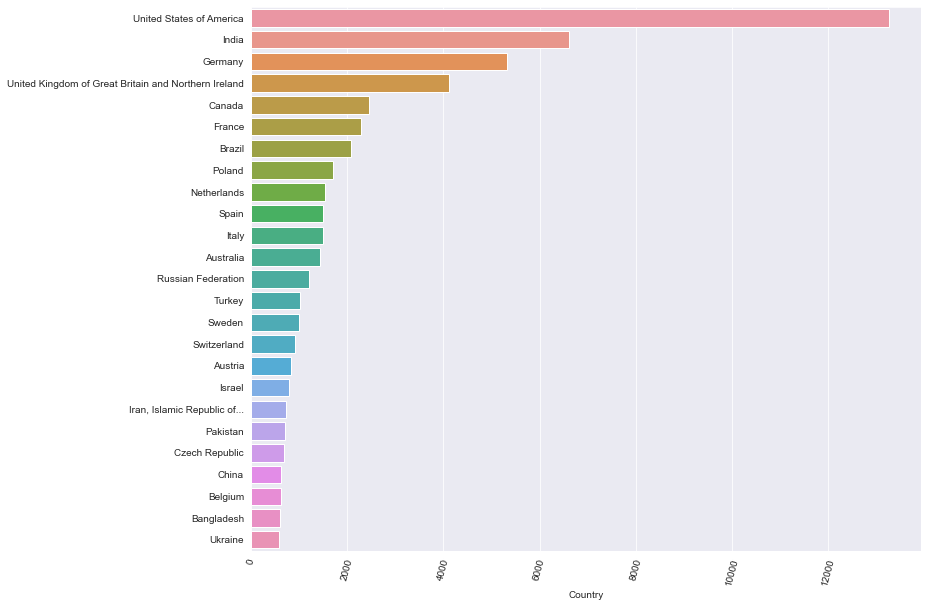

In [54]:
plt.figure(figsize=(12,10))
plt.title("")
sns.barplot(y=countries.index, x=countries);

From above we can see that Most of the participants are from USA followed by India and Germany comes art third spot. 

### Education level 

Let us take a look at the education levels of the participants.

In [57]:
survey_select_df["EdLevel"].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          29987
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15330
Some college/university study without earning a degree                                 9139
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7741
Associate degree (A.A., A.S., etc.)                                                    2209
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2144
Primary/elementary school                                                              1748
Something else                                                                         1198
Professional degree (JD, MD, etc.)                                                     1105
Name: EdLevel, dtype: int64

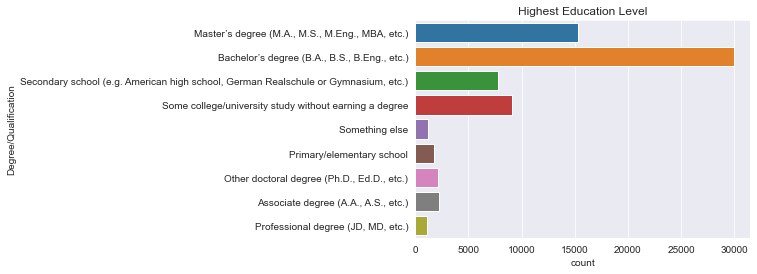

In [60]:
sns.countplot(y=survey_select_df.EdLevel)
plt.title("Highest Education Level")
plt.ylabel("Degree/Qualification");

Let us compare the Education level for the top three countries - USA, India and Germany

<AxesSubplot:xlabel='count', ylabel='EdLevel'>

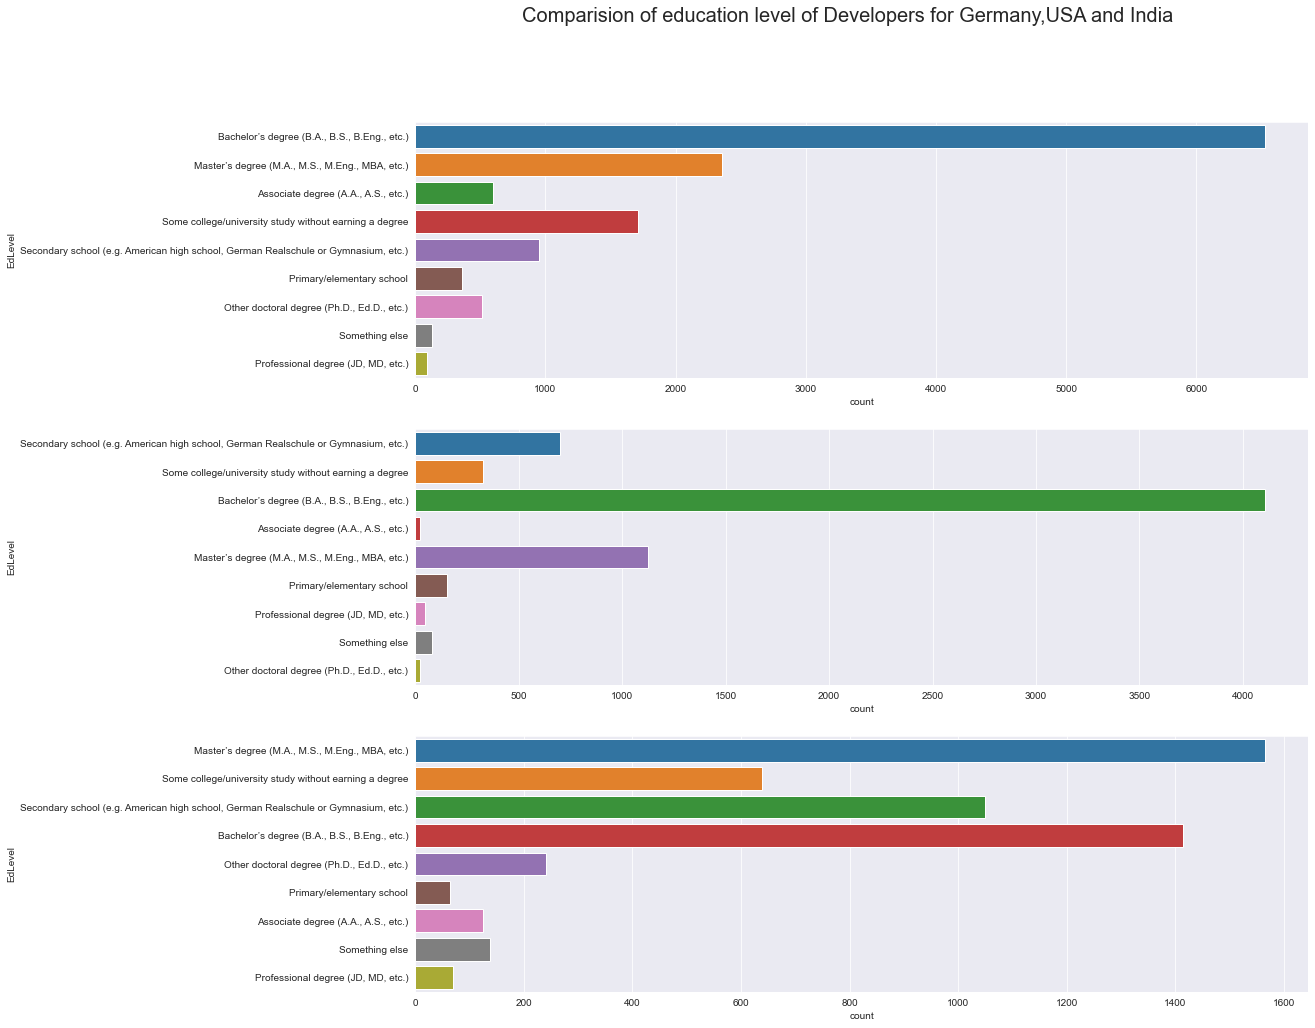

In [91]:
fig, axes = plt.subplots(3,1, figsize=(16,16))
fig.suptitle("Comparision of education level of Developers for Germany,USA and India",size=20, weight=300)


USA_survey = survey_select_df[survey_df.Country == 'United States of America']
sns.countplot(y=USA_survey.EdLevel,ax=axes[0])
India_survey = survey_select_df[survey_df.Country == 'India']
sns.countplot(y=India_survey.EdLevel,ax=axes[1])
Germany_survey = survey_select_df[survey_df.Country == 'Germany']
sns.countplot(y=Germany_survey.EdLevel,ax=axes[2])





We can observe that most of the developers are having a bachelors degree followed by Master's degree

In [63]:
USA_survey = survey_df[survey_df.Country == 'United States of America'].groupby('EdLevel').mean()
USA_survey

,ResponseId,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
EdLevel,,,,,,
"Associate degree (A.A., A.S., etc.)",35912.869852,1.209855e+05,NaN,NaN,14.621212,361347.214099
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",36422.315099,1.976675e+48,NaN,NaN,12.486162,393629.600438
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",37437.319933,2.864083e+05,NaN,NaN,15.732017,375513.126347
"Other doctoral degree (Ph.D., Ed.D., etc.)",34344.931298,2.833033e+09,NaN,NaN,16.011321,387569.232092
Primary/elementary school,38077.623342,1.365831e+05,NaN,NaN,10.205128,609848.888889
"Professional degree (JD, MD, etc.)",33393.489583,1.942913e+05,NaN,NaN,17.816327,218393.150943
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",35071.078788,1.324033e+05,NaN,NaN,13.198864,270189.482051
Some college/university study without earning a degree,35746.356655,3.086667e+05,NaN,NaN,16.011587,381635.436605
Something else,35860.474820,1.444800e+05,NaN,NaN,18.409091,648120.000000
